In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Solving Schrodinger's Equation using various root finding algorithms


For even waveunctions, the equation for finding allowed energy values is - 

f(E) = l sin(la) - K cos(la) = 0

Here, l = (2 m(E+V0)/(h bar)^(2))^(1/2);
K = (2 m(- E)/(h bar)^(2))^(1/2);
m - mass of electron
V0 = 10ev (Depth of potential well)
a = 5 angstroms (2a = width of potential well)

We normalise and find the coefficients of the wavefunction by:
B = C cos(la) exp(Ka)
F = B
(B^(2)/K) exp(-Ka) + C^(2)/2 (2a - sin(2la)/l) = 1
F, B, C are as defined in the class.
 
For odd waveunctions, the equation for finding allowed energy values is - 

f(E) = l cos(la)+ K sin(la) = 0

We normalise and find the coefficients of the wavefunction by:
B = C cos(la) exp(Ka)
F = - B
(B^(2)/K) exp(-Ka) + C^(2)/2 (2a + sin(2la)/l) = 1


In [2]:
def bisect_method(f,a,b,tol):
    #return(f(2))
    if f(a)*f(b)>0:
        return("Incorrect range")
    elif f(a)==0:
        return(a)
    elif f(b) ==0:
        return(b)
    else:
        err = abs(b-a)
        while err>=tol:
            c = (a+b)/2
                #print(c)
            if f(c)==0:
                return (c)
            elif (f(a)*f(c)<0):
                b=c
                    #print("b")
            else:
                a=c
                    #print("a")
            err = abs(b-a)

    return(a)

In [105]:
def brute_force(f,a,b):
    """Function for finding rough intervals where roots lie"""
    x = np.linspace(a,b,1000) 
    intervals = np.array([])
    for i in range(1000-1):
        if f(x[i])*f(x[i+1])<0:
            if len(intervals)==0:
                intervals = np.array([x[i],x[i+1]])
            else:
                intervals = np.vstack((intervals,np.array([x[i],x[i+1]])))
    return(intervals)

In [106]:
def func_even(E):
    """Equation to be solved for finding energy solutions for even states"""
    V0 = 10
    l = np.sqrt(E + V0)
    kappa = np.sqrt(-E)
    return(l*np.sin(l/np.sqrt(0.1523))-kappa*np.cos(l/np.sqrt(0.1523)))


In [109]:
def func_odd(E):
    """Equation to be solved for finding energy solutions for even states"""
    V0 = 10
    l = np.sqrt(E + V0)
    kappa = np.sqrt(-E)
    return(l*np.cos(l/np.sqrt(0.1523))+kappa*np.sin(l/np.sqrt(0.1523)))


In [40]:
def norm_odd(c):
    """Function for finding the coefficients of the odd wavefunction"""
    E = E_odd3
    a = 5
    V0 = 10
    la = np.sqrt(E + V0)/np.sqrt(0.1523)
    l = la/a
    ka = np.sqrt(-E)/np.sqrt(0.1523)
    k = ka/a
    B = c*np.sin(la)*np.exp(ka)
    return(((B**(2))*np.exp(-2*ka)+(c**(2))*(2*a - np.sin(2*la)/l))-1)

In [36]:
def norm_even(c):
    """Function for finding the coefficients of the odd wavefunction"""
    E = E_even3
    a = 5
    V0 = 10
    la = np.sqrt(E + V0)/np.sqrt(0.1523)
    l = la/a
    ka = np.sqrt(-E)/np.sqrt(0.1523)
    k = ka/a
    B = c*np.sin(la)*np.exp(ka)
    return(((B**(2))*np.exp(-2*ka)+(c**(2))*(2*a + np.sin(2*la)/l))-1)

In [8]:
brute_force(func_even, -10,0) #intervals where energy solutions for the even wavefunction exist

array([[-9.70970971, -9.6996997 ],
       [-7.35735736, -7.34734735],
       [-2.86286286, -2.85285285]])

In [9]:
brute_force(func_odd, -10,0) #intervals where energy solutions for the odd wavefunction exist

array([[-8.81881882, -8.80880881],
       [-5.34534535, -5.33533534],
       [-0.24024024, -0.23023023]])

In [10]:
E_odd1 = bisect_method(func_odd,-8.81881882, -8.80880881, 0.001) #finding energy solutions by finding roots 
E_odd2 = bisect_method(func_odd,-5.34534535, -5.33533534, 0.001) # of func_even
E_odd3 = bisect_method(func_odd,-0.24024024, -0.23023023, 0.001)

In [110]:
E_even1 = bisect_method(func_even,-9.70970971, -9.6996997, 0.001)#finding energy solutions by finding roots
E_even2 = bisect_method(func_even,-7.35735736, -7.34734735, 0.001) # of func_odd
E_even3 = bisect_method(func_even,-2.86286286, -2.85285285, 0.001)

In [13]:
brute_force(norm_even, -5,5) #interval of solutions to the coefficients of even wavefunctions

array([[-0.2952953 , -0.28528529],
       [ 0.28528529,  0.2952953 ]])

In [14]:
c_even1 = bisect_method(norm_even,0.28528529,  0.28728729,0.001 ) # coefficients of the even wavefunction
b_even1 = c_even1*np.cos(np.sqrt(E_even1 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_even1)/np.sqrt(0.1523))

In [16]:
brute_force(norm_even, -5,5)

array([[-0.2952953 , -0.28528529],
       [ 0.28528529,  0.2952953 ]])

In [18]:
c_even2 = bisect_method(norm_even,0.28528529,  0.2952953,0.001 )
b_even2 = c_even2*np.cos(np.sqrt(E_even2 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_even2)/np.sqrt(0.1523))

In [20]:
brute_force(norm_even, -5,5)

array([[-0.30530531, -0.2952953 ],
       [ 0.2952953 ,  0.30530531]])

In [21]:
c_even3 = bisect_method(norm_even,0.2952953 ,  0.30530531,0.001 )
b_even3 = c_even3*np.cos(np.sqrt(E_even3 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_even3)/np.sqrt(0.1523))

In [23]:
brute_force(norm_odd, -5,5) #interval of solutions to the coefficients of odd wavefunctions

array([[-0.30530531, -0.2952953 ],
       [ 0.2952953 ,  0.30530531]])

In [64]:
c_odd1 = bisect_method(norm_odd,0.2952953 ,  0.30530531,0.001 )# coefficients of the odd wavefunction
b_odd1 = -c_odd1*np.sin(np.sqrt(E_odd1 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_odd1)/np.sqrt(0.1523))
f_odd1 = -b_odd1

In [28]:
brute_force(norm_odd, -5,5)

array([[-0.30530531, -0.2952953 ],
       [ 0.2952953 ,  0.30530531]])

In [65]:
c_odd2 = bisect_method(norm_odd,0.2952953 ,  0.30530531,0.001 )
b_odd2 = -c_odd2*np.sin(np.sqrt(E_odd2 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_odd2)/np.sqrt(0.1523))
f_odd2 = -b_odd2

In [41]:
brute_force(norm_odd, -5,5)

array([[-0.30530531, -0.2952953 ],
       [ 0.2952953 ,  0.30530531]])

In [66]:
c_odd3 = bisect_method(norm_odd,0.2952953 ,  0.30530531,0.001 )
b_odd3 = -c_odd3*np.sin(np.sqrt(E_odd3 + 10)/np.sqrt(0.1523))*np.exp(np.sqrt(-E_odd3)/np.sqrt(0.1523))
f_odd3 = -b_odd3

In [83]:
def wf_b(b,E):
    """Function for plotting wavefunction for x < -a"""
    k = (np.sqrt(-E)/np.sqrt(0.1523))/5
    psi = np.array([])
    x = np.linspace(-20,20,200)
    for i in x:
        if i<=-5:
            psi = np.append(psi,b*np.exp(k*i))
        else:
            psi = np.append(psi, 0)
    return(psi)

In [111]:
def sincos(c,string,E):
    """Function for plotting wavefunction for -a < x < a"""
    psi = np.array([])
    x = np.linspace(-20,20,200)
    l = (np.sqrt(E + 10)/np.sqrt(0.1523))/5
    if string == 'odd':
        for i in x:
            if i>=-5 and i<=5:
                psi = np.append(psi,c*np.sin(l*i))
            else:
                psi = np.append(psi,0)
    else:
        for i in x:
            if i>=-5 and i<=5:
                psi = np.append(psi,c*np.cos(l*i))
            else:
                psi = np.append(psi,0)
    return(psi)

In [112]:
def wf_f(b,E):
    """Function for plotting wavefunction for x > a"""
    k = (np.sqrt(-E)/np.sqrt(0.1523))/5
    psi = np.array([])
    x = np.linspace(-20,20,200)
    for i in x:
        if i>=5:
            psi = np.append(psi,b*np.exp(-k*i))
        else:
            psi = np.append(psi, 0)
    return(psi)

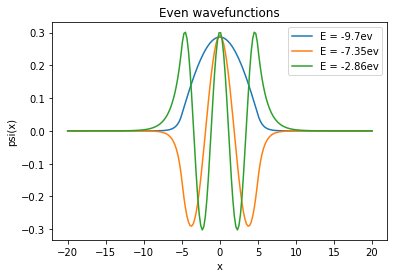

In [100]:
plt.plot(np.linspace(-20,20,200),wf_b(b_even1, E_even1)+sincos(c_even1,'even', E_even1)+ wf_f(b_even1, E_even1))
plt.plot(np.linspace(-20,20,200),wf_b(b_even2, E_even2)+sincos(c_even2,'even', E_even2)+ wf_f(b_even2, E_even2))
plt.plot(np.linspace(-20,20,200),wf_b(b_even3, E_even3)+sincos(c_even3,'even', E_even3)+ wf_f(b_even3, E_even3))
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.legend(['E = -9.7ev','E = -7.35ev','E = -2.86ev'])
plt.title("Even wavefunctions")
plt.show()

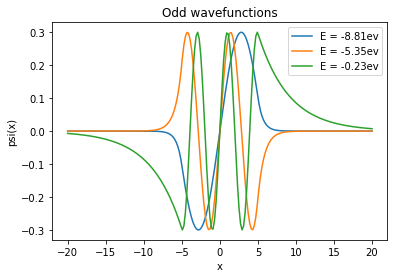

In [104]:
plt.plot(np.linspace(-20,20,200),wf_b(b_odd1, E_odd1)+sincos(c_odd1,'odd', E_odd1)+ wf_f(f_odd1, E_odd1))
plt.plot(np.linspace(-20,20,200),wf_b(b_odd2, E_odd2)+sincos(c_odd2,'odd', E_odd2)+ wf_f(f_odd2, E_odd2))
plt.plot(np.linspace(-20,20,200),wf_b(b_odd3, E_odd3)+sincos(c_odd3,'odd', E_odd3)+ wf_f(f_odd3, E_odd3))
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.legend(['E = -8.81ev','E = -5.35ev','E = -0.23ev'])
plt.title("Odd wavefunctions")
plt.show()